# Integral generator

This tool generates random integrals. Please set difficulty to 1 or the integrals it makes are ridiculously difficult to solve.

In [83]:
import sympy
from sympy import Symbol, diff, simplify
from random import randint, choice
sympy.init_printing()

In [47]:
elementary_funcs = ["square", "cube", "sqrt", "cbrt", "exp", "log", \
                    "sin", "cos", "tan", "csc", "sec", \
                    "cot", "asin", "acos", "atan"]

In [51]:
def square(x):
    return x ** 2

In [52]:
def cube(x):
    return x ** 3

In [53]:
sympy.square = square

In [65]:
sympy.cube = cube

In [85]:
def generate_func(expr, seed=2):
    i = randint(0, 1)
    if i:
        # polynomial function
        f = getattr(sympy, choice(elementary_funcs))
        return f(expr)
    else:
        # linear function
        a = randint(0, 9)
        return a * expr

In [88]:
def generate_random_expr(difficulty):
    x = Symbol("x")
    expr = generate_func(x)
    for i in range(difficulty):
        # 5 options: addition, subtraction,
        # multiplication, division, composition
        i = randint(0, 5)
        other_expr = generate_func(x)
        if i == 0:
            expr += other_expr
        elif i == 1:
            expr -= other_expr
        elif i == 2:
            expr *= other_expr
        elif i == 4:
            expr /= other_expr
        else:
            # composition
            expr = generate_func(expr)
    return expr, x

In [96]:
def generate_integral(difficulty=2):
    integration_constant = Symbol("C")
    answer, x = generate_random_expr(difficulty)
    integrand = diff(answer)
    integral = sympy.Integral(integrand, x)
    return integral, answer + integration_constant

In [97]:
i, a = generate_integral()

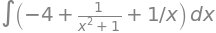

In [98]:
i

In [61]:
# uncomment and run to show the answer
# simplify(a)